Getting into events per day format in a csv. Set up for Mt St Helens - created December 2022

In [18]:
import pandas as pd
import yaml
import numpy as np
import csv
import matplotlib.pyplot as plt

In [15]:
with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

vv = config['vv']
volc_list_names = config['volc_list_names']
volc = volc_list_names[vv]
year = config['year']
readdir = config['readdir']
homedir = config['homedir']

In [6]:
#read the St_Helens csvs

St_Helens = pd.read_csv(readdir+'MountStHelens_catalog.csv')

# Combining borehole and local catalogs with St_Helens

Helens_Borehole = pd.read_csv(readdir+'MSHborehole_catalog.csv')
Helens_Borehole['Clustered'] += 2000 
# Cluster 0 in Helens_Borehole is now Cluster 2000 in St_Helens
Helens_Local = pd.read_csv(readdir+'MSHlocal_catalog.csv')
Helens_Local['Clustered'] += 3000
# Cluster 0 in Helens_Local is now Cluster 3000 in St_Helens

# Use St_Helens to access all three St Helens catalogs
St_Helens = pd.concat([St_Helens,Helens_Borehole,Helens_Local])

In [17]:
#basic form:

dt_list = St_Helens['datetime'].values.tolist() #get a list of datetimes

d_list = [] #get list of dates
for dt in dt_list:
    d = dt[:10] #take the date out of the datetime
    d_list.append(d) #append to list

uni_d_list = np.unique(d_list)

num_list = [] #list of number of events on that date, index is the same as uni_d_list
for i in uni_d_list:
    num = d_list.count(i)
    num_list.append(num)

df = pd.DataFrame(list(zip(uni_d_list,num_list)))
df.columns = ['Date','Number_of_Events']
print(df)

df.to_csv(homedir+'Mt_St_Helens_events_per_day.csv',index=False)

            Date  Number_of_Events
0     2009-01-16                 2
1     2009-01-23                 1
2     2009-01-24                 1
3     2009-02-03                 3
4     2009-02-05                 1
...          ...               ...
2831  2022-06-18                 7
2832  2022-06-19                 6
2833  2022-06-20                 3
2834  2022-06-21                 5
2835  2022-06-22                 3

[2836 rows x 2 columns]


Plot

Text(0.5, 1.0, 'Number of Repeating Events per Day found by REDPy on Mt St Helens')

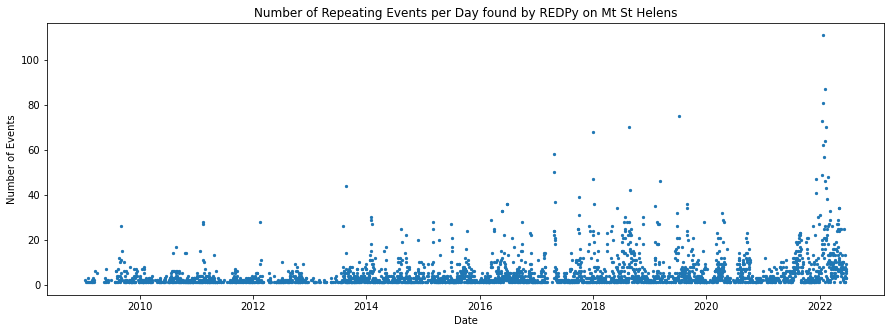

In [49]:
x = df['Date'].values.tolist()
str_x = [str(i) for i in x]
x = pd.to_datetime(str_x)

y = df['Number_of_Events'].values.tolist()

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(x,y,s=5)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Events')
ax.set_title('Number of Repeating Events per Day found by REDPy on Mt St Helens')